# Regressions

In [149]:
import sys
import os
cp = '/home/jupyter-gabriel/' #'I:/My Drive/'
sys.path.append(cp + "projects/suyana")
from scripts.utils.functions import *

In [150]:
# Data primary path
dpp = 'suyana/'
# Data inputs path
dip = 'suyana/inputs/'
# Data features path
dfp = 'suyana/features/'
# Data outputs path
dop = 'suyana/outputs/'
# Data reports path
drp = 'suyana/reports/'
# Data models path
dmp = 'suyana/models/'
# Data displays path
ddp = 'suyana/displays/'
# Data geometries path
dgp = 'suyana/geometries/'

# Load data

In [151]:
# data_folder = Path("../Data/data_output_rendimiento")
# filename = "df_rendimiento_flagged_ONI.csv"
data_folder = dfp 
filename = "drought_yields_panel_final.csv"
df = pd.read_csv(data_folder + filename)

# Explore Data in file

In [152]:
df.head(3)

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,ndvi_anomaly_flowering_date_minus_2_month,ndpi_anomaly_flowering_date_minus_2_month,pp_anomaly_flowering_date_minus_2_month,vhi_anomaly_flowering_date_minus_2_month,Month,Year,ENSO,pixel_id,anomaly_sum,swc_sum,climatology_sum,id_canton,canton_original,provincia,municipio,departamen,culture_orig,crop_year,flag_summer,accum_anomaly,accum_neg_anomaly,lon,lat,accum_cycle_neg_anomaly,accum_cycle_anomaly
0,16,Norte,H-2,Las Londras,Sorgo,Timbo,NaN,2016-09-13,0.45,11.0,244444.440,45,110,1.1,MAP,11-52-0,100,1.000000,NaN,NaN,67,2,SORGO,2016,0,...,NaN,NaN,NaN,NaN,9.0,2016.0,ninia,0.0,0.000000,0.0,0.000000,189,El Puente,Guarayos,El Puente,Santa Cruz,SORGO,2016,0,-10.084363,10.501257,-63.48191,-16.36096,7.660170,-7.291966
1,14,Este,B04,Europa,Maiz,Maiz 355,2013-03-10,2013-08-20,0.42,2.4,57142.857,5/14/2013,7/13/2013,2.1,0,0,0,1.994742,NaN,NaN,45,1,MAIZ,2013,0,...,-36100.439166,1.791396,-109.046194,-1606.263388,8.0,2013.0,NaN,0.0,10141.265152,25988.0,15846.734848,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,MAIZ,2013,0,2.956861,0.565595,-62.35004,-17.05833,0.621765,2.890641
2,14,Este,A09,Europa,Sorgo,DAS-5000,2013-03-19,2013-07-24,0.42,9.0,214285.710,5/3/2013,7/7/2013,1.1,0,0,0,2.323631,NaN,NaN,43,2,SORGO,2013,0,...,-14995.596168,0.469207,-157.261620,-1528.424227,7.0,2013.0,NaN,0.0,8117.090909,20801.0,12683.909091,56,Saturnino,Ńuflo de Chavez,San Julian,Santa Cruz,SORGO,2013,0,3.131497,0.354238,-62.33751,-17.07043,0.659526,2.883549


In [153]:
df_missings = pd.DataFrame({'column':list(df.columns), 'missings': list(df.count())})
display(df_missings)

,column,missings
0,producer_id,710
1,zone,710
2,lot,710
3,plot,710
4,orig_crop,710
...,...,...
96,accum_neg_anomaly,703
97,lon,710
98,lat,710
99,accum_cycle_neg_anomaly,710


# Ubicación geográfica

Utilizar folium para tener una idea de la ubicación geográfica de los puntos de referencia.

In [5]:
#Locate centroid based on latitude and longitude
center = [ df["latitude"].mean(), df["longitude"].mean()]

In [6]:
#Create a Folium Map centered at the center coordinates to add layers of points
map = folium.Map(location = center, zoom_start = 8)

#Create a palette to color the markers based on category
unique_categories = df['zone'].unique()
palette = sns.color_palette("hsv", len(unique_categories)).as_hex()
color_map = dict(zip(unique_categories, palette))

for _, row in df.iterrows():
  folium.CircleMarker(
      location = [row["latitude"], row["longitude"]],
      radius = 6,
      color = color_map[row['zone']],
      opacity = 0.1,
      #fill = True,
      fill_color = color_map[row['zone']],
      fill_opacity = 0.1,
      popup = row['zone'],
      icon = folium.Icon(color='green')
  ).add_to(map)

#Display Map
map

In [7]:
df.groupby('yr').agg(n = ('yr','count'))

,n
yr,
2013,77
2014,169
2015,166
2016,166
2017,131
2018,51


# Conclusiones iniciales

* Data since 2013 up to 2018 of crop yields.
* This data comes from crops in the north region of Santa Cruz, Bolivia.

# Plot data

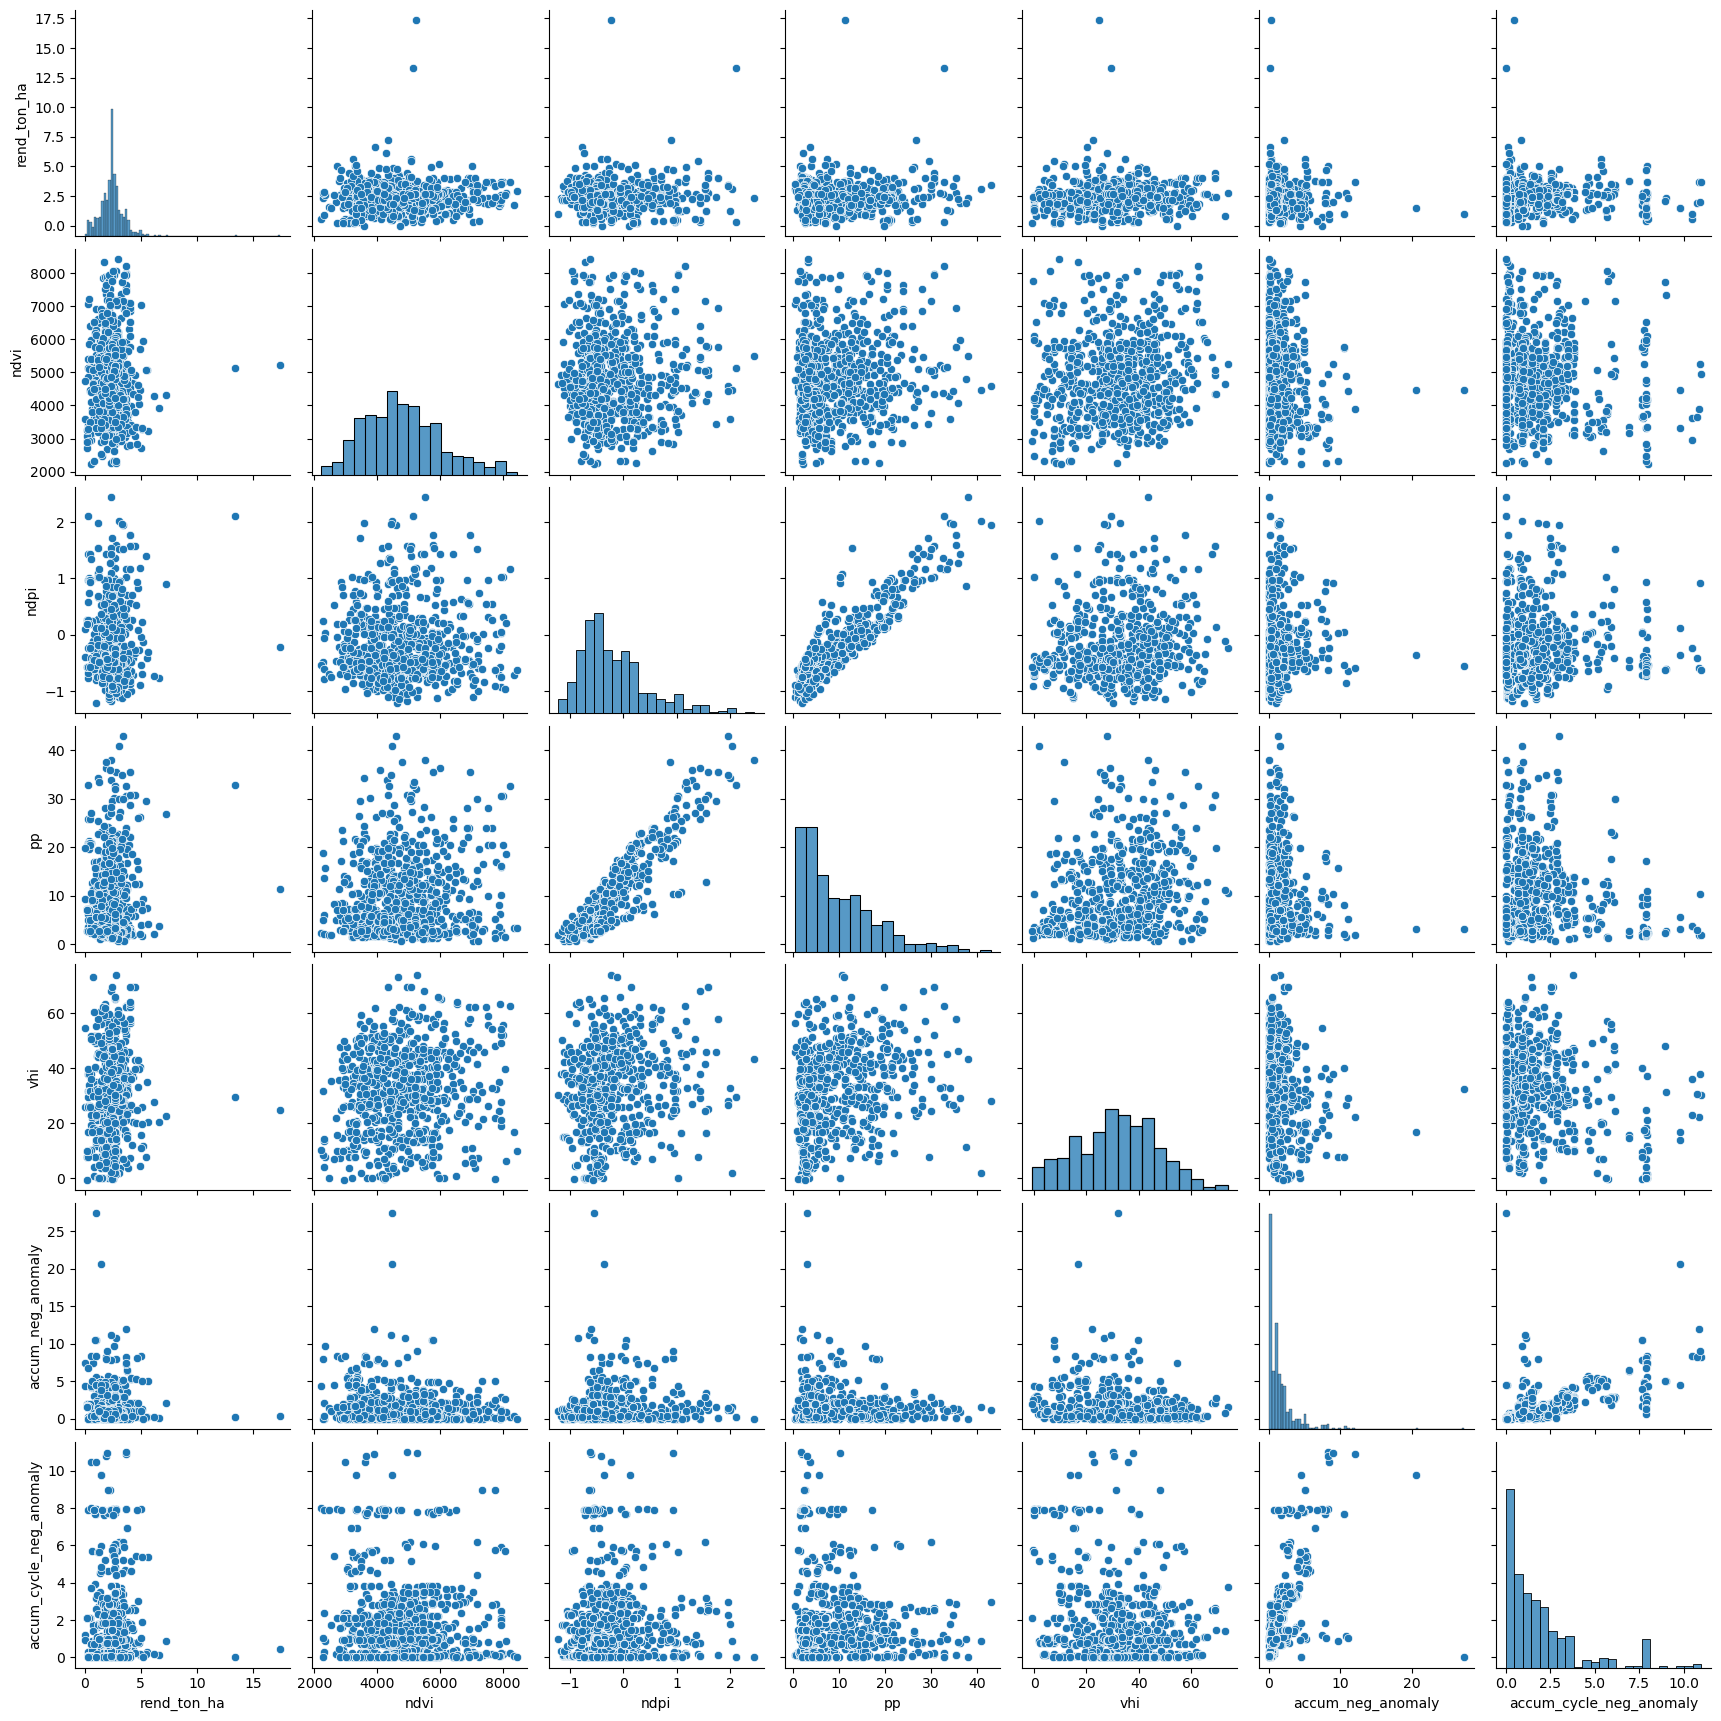

In [25]:
sns.pairplot(df, vars=["rend_ton_ha", "ndvi", "ndpi", "pp", "vhi", "accum_neg_anomaly", "accum_cycle_neg_anomaly"])

# Plot seedtime

In [29]:
# Assuming df is your DataFrame with the "seedtime" column

# Convert "seedtime" column to datetime format
df["seedtime"] = pd.to_datetime(df["seedtime"], errors="coerce")
#df["seedtime"]

# Extract month and year
df["month"] = df["seedtime"].dt.month
df["year"] = df["seedtime"].dt.year

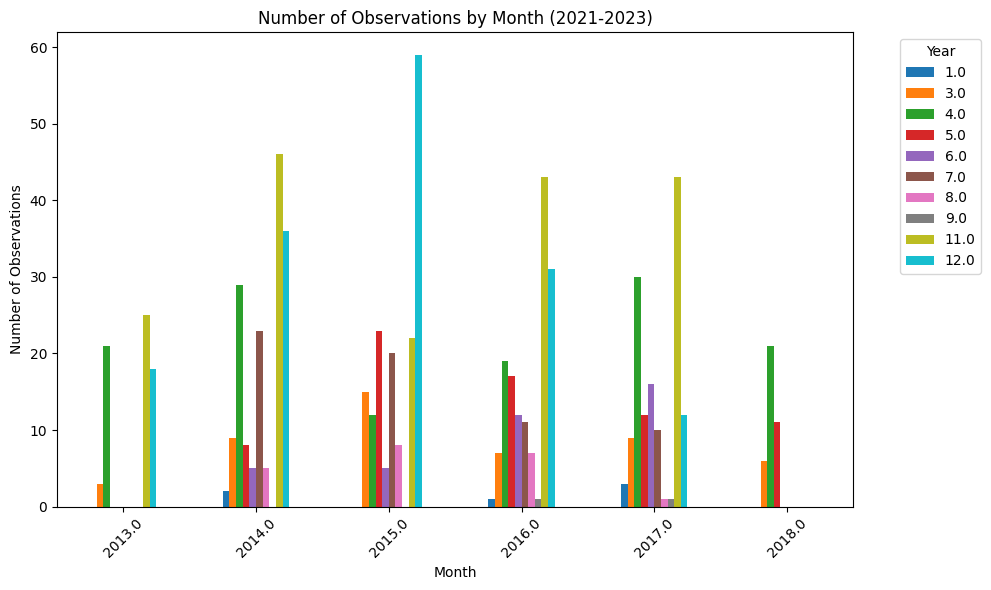

In [231]:
# Group by month and year and count observations
monthly_counts = df.groupby(["year", "month"]).size().unstack(fill_value=0)

# Plot the bar chart
monthly_counts.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Number of Observations by Month (2021-2023)")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Create Master Table for Regression

In [155]:
def apply_log_to_var(df_orig, var, fill_value="mean"):
    """
    Apply the natural logarithm to the specified variables in the DataFrame.

    Parameters:
        df_orig (pd.DataFrame): DataFrame containing the client variables.
        params (dict): Dictionary containing the parameters to apply the natural logarithm.

    Returns:
        pd.DataFrame: Modified DataFrame with the natural logarithm applied to the specified variables.
    """
    df = df_orig.copy()
       
    # Apply the natural logarithm
    min_value = df.loc[df[var] > 0, var].min()
    df[var] = np.where(df[var] <= 0, min_value*0.9, df[var])

    df["log_"+var] = np.log(df[var])
    df["log_"+var] = np.where(
        df["log_"+var].isin([np.inf, -np.inf]), 
        np.nan, 
        df["log_"+var]
    )
    if fill_value == "mean":
        df["log_"+var] = df["log_"+var].fillna(df["log_"+var].mean())
    else:
        df["log_"+var] = df["log_"+var].fillna(fill_value)

    return df

In [156]:
def create_mt(df_orig, target, params):
    """
    Trains a regression model on the given data.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        target (str): Name of the target variable.
        params (dict): Hyperparameters for the model.

    Returns:
        object: Trained regression model.
    """

    df = df_orig.copy()
    # Parameters
    list_log_vars = params['list_log_vars']

    # Get the log of the target variable and add it to the DataFrame
    df = apply_log_to_var(df, target)

    for var in list_log_vars:
        df = apply_log_to_var(df, var, fill_value=1e10)
    
    return df

In [157]:
df_aux = df.copy()

In [158]:
params_log_vars = {
    'list_log_vars': ['ndvi', 'ndpi', 'pp', 'vhi', 'anomaly_sum', 'swc_sum', 'accum_neg_anomaly', 'accum_cycle_neg_anomaly']
}
df_mt = create_mt(df_aux, 'rend_ton_ha', params_log_vars)

In [12]:
def train_model(df_orig, params):
    """
    Trains a regression model on the given data.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        target (str): Name of the target variable.
        features (list): List of feature variables to use in the model.
        model (object): Regression model object to use for training.

    Returns:
        object: Trained regression model.
    """
    formula_str = params["formula_str"]
    filter_str = params["filter_str"]

    df = df_orig.copy()

    # Filter the data
    df = df.query(filter_str)

    # Train the model
    model = sfm.ols(formula=formula_str, data=df)
    results = model.fit()

    return model, results

### Pairplots

In [39]:
df_mt.loc[(df_mt['culture']=='SOYA') & (df_mt['log_rend_ton_ha']<-0.55),:]

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,swc_sum,climatology_sum,id_canton,canton_original,provincia,municipio,departamen,culture_orig,crop_year,flag_summer,accum_anomaly,accum_neg_anomaly,lon,lat,accum_cycle_neg_anomaly,accum_cycle_anomaly,log_rend_ton_ha,log_ndvi,log_ndpi,log_pp,log_vhi,log_anomaly_sum,log_swc_sum,log_accum_neg_anomaly,log_accum_cycle_neg_anomaly
295,16,Norte,D-2,Las Londras,Soya,Semwest 4879,2015-07-27,2015-11-11,0.40,14.0,350000.00,42250,42322,0.7,MAP,11-52-0,50,0.31,NaN,NaN,65,4,SOYA,2015,0,...,12725.0,9400.060606,189,El Puente,Guarayos,El Puente,Santa Cruz,SOYA,2015,0,4.715706,0.000110,-63.45223,-16.38440,0.000053,10.204007,-1.171183,8.134122,-5.938508,1.235106,3.679082,8.109207,9.451324,-9.115823,-9.847555
444,16,Norte,B-2,Las Londras,Soya,NA-8015,2016-07-08,2016-11-02,0.45,13.0,288888.89,42597,42669,0.6,MAP,11-52-0,100,0.55,NaN,NaN,63,4,SOYA,2016,0,...,15072.0,10435.500000,189,El Puente,Guarayos,El Puente,Santa Cruz,SOYA,2016,0,-4.086630,4.419748,-63.44300,-16.40368,7.988109,-7.654991,-0.597837,7.706278,-5.938508,0.780802,2.322143,8.441715,9.620594,1.486083,2.077954


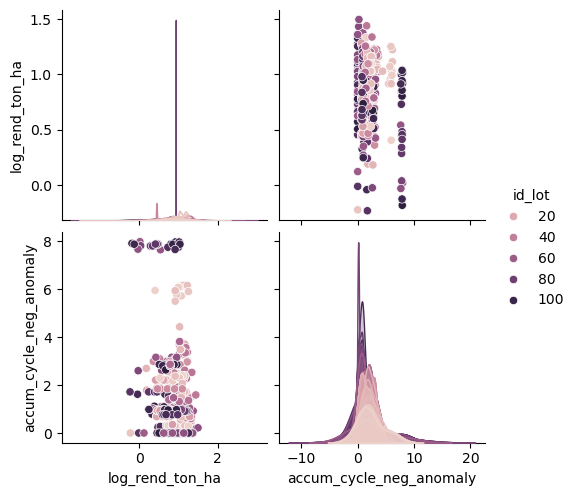

In [41]:
sns.pairplot(data=df_mt.loc[(df_mt['culture']=='SOYA') & ~(df_mt['id_lot'].isin([63,65])),["log_rend_ton_ha", "accum_cycle_neg_anomaly", "id_lot"]], hue='id_lot')
#"ndvi", "ndpi", "pp", "vhi", "accum_neg_anomaly",

### Regress log_rend_ton_ha on log_anomaly_sum interacting with culture

In [22]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ log_anomaly_sum/culture',
    'filter_str': 'rend_ton_ha < 30'
}
mod, results_full = train_model(df_mt, params_model)

results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     43.22
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           6.87e-39
Time:                        18:32:01   Log-Likelihood:                -480.54
No. Observations:                 710   AIC:                             973.1
Df Residuals:                     704   BIC:                             1000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2661      0.318      0.837      0.403      -0.358       0.890
log_anomaly_sum                      0.1012      0.037      2.762      0.006       0.029       0.173
log_anomaly_sum:culture[T.OTRO]     -0.1733      0.015    -11.675      0.000      -0.202      -0.144
log_anomaly_sum:culture[T.SORGO]    -0.0343      0.009     -3.933      0.000      -0.051      -0.017
log_anomaly_sum:culture[T.SOYA]     -0.0337      0.008     -4.344      0.000      -0.049      -0.018
log_anomaly_sum:culture[T.TRIGO]    -0.0878      0.009     -9.756      0.000      -0.105      -0.070
==============================================================================
Omnibus:                      204.890   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.004
Skew:                          -1.358   Prob(JB):                    1.09e-149
Kurtosis:                       6.976   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log_rend_ton_ha on log_anomaly_sum only

In [41]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ log_anomaly_sum',
    'filter_str': 'rend_ton_ha < 10 & anomaly_sum < 10000'
}
mod, results_red = train_model(df_mt, params_model)

results_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.314
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0382
Time:                        19:44:04   Log-Likelihood:                -567.79
No. Observations:                 707   AIC:                             1140.
Df Residuals:                     705   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1474      0.298      0.495      0.621      -0.437       0.732
log_anomaly_sum     0.0728      0.035      2.077      0.038       0.004       0.142
==============================================================================
Omnibus:                      261.136   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.749
Skew:                          -1.776   Prob(JB):                    3.39e-192
Kurtosis:                       7.161   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log rend ton ha on log of accumulated anomaly controlling crop

In [27]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ accum_cycle_neg_anomaly*culture',
    'filter_str': 'culture=="SOYA" & rend_ton_ha < 10'
}
mod, results_full = train_model(df_mt, params_model)

results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.20
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           6.76e-05
Time:                        20:52:18   Log-Likelihood:                -108.53
No. Observations:                 419   AIC:                             221.1
Df Residuals:                     417   BIC:                             229.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8990      0.022     41.377      0.000       0.856       0.942
accum_cycle_neg_anomaly    -0.0324      0.008     -4.025      0.000      -0.048      -0.017
==============================================================================
Omnibus:                      138.600   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.137
Skew:                          -1.409   Prob(JB):                    2.88e-126
Kurtosis:                       8.018   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress log rend ton ha on accumulatedAnomaly only

In [46]:
params_model = {
    'formula_str': 'log_rend_ton_ha ~ accum_cycle_neg_anomaly',
    'filter_str': 'culture=="SOYA" & rend_ton_ha < 10'
}
mod, results_red = train_model(df_mt, params_model)

results_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     16.20
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           6.76e-05
Time:                        21:11:05   Log-Likelihood:                -108.53
No. Observations:                 419   AIC:                             221.1
Df Residuals:                     417   BIC:                             229.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8990      0.022     41.377      0.000       0.856       0.942
accum_cycle_neg_anomaly    -0.0324      0.008     -4.025      0.000      -0.048      -0.017
==============================================================================
Omnibus:                      138.600   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.137
Skew:                          -1.409   Prob(JB):                    2.88e-126
Kurtosis:                       8.018   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Results for soy culture
std_anomaly = df_mt.query(params_model['filter_str'])['accum_cycle_neg_anomaly'].std()
df_filtered = df_mt.query(params_model['filter_str'])
for crop in list(df_mt.query(params_model['filter_str'])['culture'].unique()):
    try:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            (results_full.params['accum_cycle_neg_anomaly']) * std_anomaly
        )
        print(f'Una desviación de 1 std en accum_cycle_neg_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')
    except:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            results_full.params['Intercept'] + 
            (results_full.params['log_anomaly_sum']) * std_log_anomaly
        )
        print(f'Una desviación de 1 std en log_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')

Una desviación de 1 std en accum_cycle_neg_anomaly implica un cambio de 0.94 en rendimiento de SOYA o 38.91% del rendimiento medio 2.42


In [ ]:
df_mt.to_csv(dop + 'drought_yields_panel_results.csv', index = False)

In [28]:
mean_rend

2.4158035119350667

In [26]:
var_rend_ton_ha

2.3098115921959255

In [25]:
std_anomaly

1.91171882308818

In [40]:
np.quantile(df_mt.query(params_model['filter_str'])['accum_cycle_neg_anomaly'], 0.95)

7.739672597696034

In [37]:
np.mean(df_mt.query(params_model['filter_str'])['accum_cycle_neg_anomaly'])

1.9122130105876787

In [55]:
np.exp(
    (results_full.params['accum_cycle_neg_anomaly']) * 2* np.std(df_mt.query(params_model['filter_str'])['accum_cycle_neg_anomaly'])
)*mean_rend

2.134930077612332

In [47]:
(results_full.params['accum_cycle_neg_anomaly'])

-0.03236506542205147

## Compare models

In [54]:
import statsmodels.api as sm
from scipy.stats import f
import numpy as np

def compare_models(full_model, reduced_model):
    """
    Compare two nested models (reduced and full) using AIC, BIC, Bayes factor, and F-test.

    Parameters:
        reduced_model: Fitted statsmodels OLS model (reduced model).
        full_model: Fitted statsmodels OLS model (full model).

    Returns:
        dict: A dictionary with AIC, BIC, Bayes factor, F-statistic, and p-value.
    """
    # Extract AIC and BIC
    aic_reduced = reduced_model.aic
    bic_reduced = reduced_model.bic
    aic_full = full_model.aic
    bic_full = full_model.bic

    # Residual Sum of Squares and Degrees of Freedom
    rss_reduced = reduced_model.ssr
    rss_full = full_model.ssr
    df_reduced = reduced_model.df_resid
    df_full = full_model.df_resid
    print(df_full)
    print(df_reduced)

    # F-test
    num = (rss_reduced - rss_full) / (df_reduced - df_full)  # Numerator
    den = rss_full / df_full  # Denominator
    F_stat = num / den
    p_value = f.sf(F_stat, df_reduced - df_full, df_full)

    # Bayes Factor (BIC-based approximation)
    bayes_factor = np.exp((reduced_model.bic - full_model.bic) / 2)

    df_compare = pd.DataFrame()

    # Include the results of full model
    df_compare.loc[0, 'model'] = 'Full'
    df_compare.loc[0, 'aic'] = aic_full
    df_compare.loc[0, 'bic'] = bic_full
    df_compare.loc[0, 'bayesFactor'] = bayes_factor
    df_compare.loc[0, 'rss'] = rss_full
    df_compare.loc[0, 'F-statistic'] = F_stat
    df_compare.loc[0, 'p-value'] = p_value

    # Include the results of reduced model
    df_compare.loc[1, 'model'] = 'Reduced'
    df_compare.loc[1, 'aic'] = aic_reduced
    df_compare.loc[1, 'bic'] = bic_reduced
    df_compare.loc[1, 'rss'] = rss_reduced

    return df_compare

In [55]:
compare_models(results_full, results_red)

698.0
706.0


,model,aic,bic,bayesFactor,rss,F-statistic,p-value
0,Full,925.519965,971.144406,2.197199e+35,148.940966,31.001046,1.102031e-41
1,Reduced,1124.774841,1133.899730,NaN,201.861605,NaN,NaN


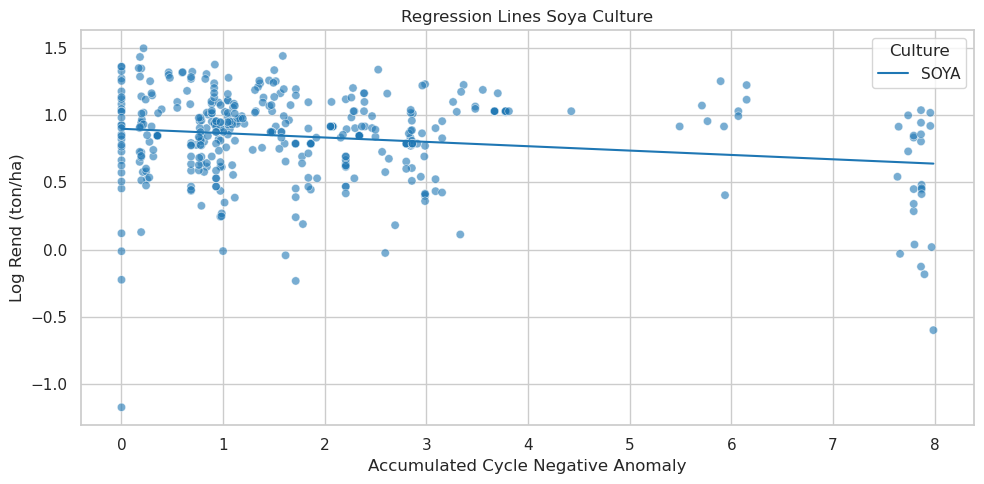

In [48]:
# Generate a grid of values for plotting
df_mt_plot = df_mt.query(params_model['filter_str']).copy() #.loc[~(df_mt['id_lot'].isin([63,65])),:]
cultures = df_mt_plot['culture'].unique()
anomaly_range = np.linspace(df_mt_plot['accum_cycle_neg_anomaly'].min(), df_mt_plot['accum_cycle_neg_anomaly'].max(), 100)

# Create an empty DataFrame for plotting
plot_data = pd.DataFrame({
    'accum_cycle_neg_anomaly': np.tile(anomaly_range, len(cultures)),
    'culture': np.repeat(cultures, len(anomaly_range))
})

# Use the fitted model to predict values
plot_data['predicted_log_rend'] = (
    0.8990 # Intercept
    + plot_data['accum_cycle_neg_anomaly'] * (-0.0324)  # Main effect
    + np.where(
        plot_data['culture'] == 'OTRO',
        plot_data['accum_cycle_neg_anomaly'] * -0.7725, 0
    )
    + np.where(
        plot_data['culture'] == 'SORGO',
        plot_data['accum_cycle_neg_anomaly'] * -0.1003, 0
    )
    + np.where(
        plot_data['culture'] == 'SOYA',
        plot_data['accum_cycle_neg_anomaly'] * 0, 0
    )
    + np.where(
        plot_data['culture'] == 'TRIGO',
        plot_data['accum_cycle_neg_anomaly'] * -0.1708, 0
    )
)

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Plot regression lines for each culture
sns.lineplot(
    data=plot_data,
    x='accum_cycle_neg_anomaly',
    y='predicted_log_rend',
    hue='culture',
    palette='tab10'
)

# Add scatter points from the original data
sns.scatterplot(
    data=df_mt_plot,
    x='accum_cycle_neg_anomaly',
    y='log_rend_ton_ha',
    hue='culture',
    palette='tab10',
    alpha=0.6,
    legend=False
)

plt.title('Regression Lines Soya Culture')
plt.xlabel('Accumulated Cycle Negative Anomaly')
plt.ylabel('Log Rend (ton/ha)')
plt.legend(title='Culture')
plt.tight_layout()
plt.show()

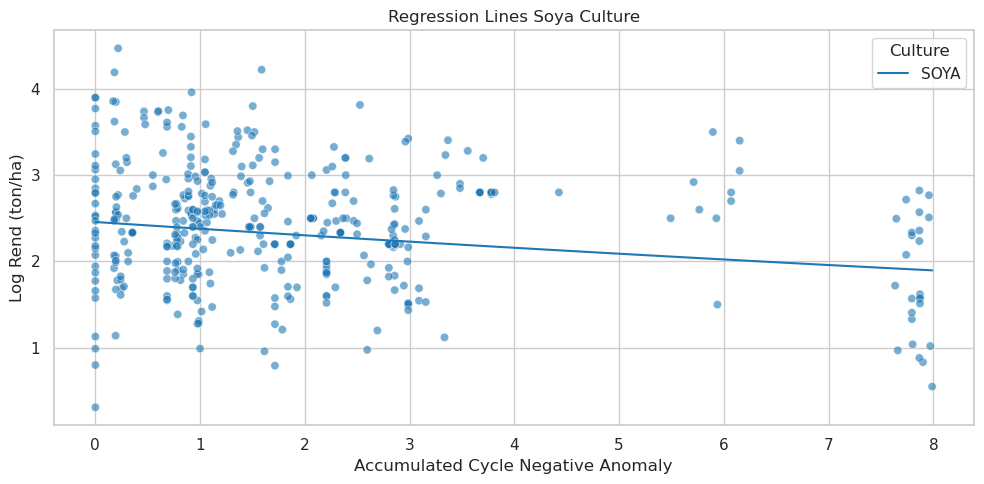

In [48]:
# Generate a grid of values for plotting
df_mt_plot = df_mt.query(params_model['filter_str']).copy()
cultures = df_mt_plot['culture'].unique()
anomaly_range = np.linspace(df_mt_plot['accum_cycle_neg_anomaly'].min(), df_mt_plot['accum_cycle_neg_anomaly'].max(), 100)

# Create an empty DataFrame for plotting
plot_data = pd.DataFrame({
    'accum_cycle_neg_anomaly': np.tile(anomaly_range, len(cultures)),
    'culture': np.repeat(cultures, len(anomaly_range))
})

# Use the fitted model to predict values
plot_data['predicted_log_rend'] = np.exp(
    0.8990 # Intercept
    + plot_data['accum_cycle_neg_anomaly'] * (-0.0324)  # Main effect
    + np.where(
        plot_data['culture'] == 'OTRO',
        plot_data['accum_cycle_neg_anomaly'] * -0.7725, 0
    )
    + np.where(
        plot_data['culture'] == 'SORGO',
        plot_data['accum_cycle_neg_anomaly'] * -0.1003, 0
    )
    + np.where(
        plot_data['culture'] == 'SOYA',
        plot_data['accum_cycle_neg_anomaly'] * 0, 0
    )
    + np.where(
        plot_data['culture'] == 'TRIGO',
        plot_data['accum_cycle_neg_anomaly'] * -0.1708, 0
    )
)

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Plot regression lines for each culture
sns.lineplot(
    data=plot_data,
    x='accum_cycle_neg_anomaly',
    y='predicted_log_rend',
    hue='culture',
    palette='tab10'
)

# Add scatter points from the original data
sns.scatterplot(
    data=df_mt_plot,
    x='accum_cycle_neg_anomaly',
    y='rend_ton_ha',
    hue='culture',
    palette='tab10',
    alpha=0.6,
    legend=False
)

plt.title('Regression Lines Soya Culture')
plt.xlabel('Accumulated Cycle Negative Anomaly')
plt.ylabel('Log Rend (ton/ha)')
plt.legend(title='Culture')
plt.tight_layout()
plt.show()

In [52]:
list(df_mt['culture'].unique())

['SORGO', 'MAIZ', 'TRIGO', 'OTRO', 'SOYA']

In [318]:
std_log_anomaly = df_mt.query(params_model['filter_str'])['log_anomaly_sum'].std()
df_filtered = df_mt.query(params_model['filter_str'])
for crop in list(df_mt['culture'].unique()):
    try:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            results_full.params['Intercept'] + 
            (results_full.params['log_anomaly_sum'] + 
            results_full.params['log_anomaly_sum:culture[T.'+crop+']']) * std_log_anomaly
        )
        print(f'Una desviación de 1 std en log_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')
    except:
        mean_rend = df_filtered.loc[df_filtered['culture']==crop,'rend_ton_ha'].mean()
        var_rend_ton_ha = np.exp(
            results_full.params['Intercept'] + 
            (results_full.params['log_anomaly_sum']) * std_log_anomaly
        )
        print(f'Una desviación de 1 std en log_anomaly implica un cambio de {var_rend_ton_ha:.2f} en rendimiento de {crop} o {var_rend_ton_ha/mean_rend:.2%} del rendimiento medio {mean_rend:.2f}')

Una desviación de 1 std en log_anomaly implica un cambio de 0.49 en rendimiento de SORGO o 18.67% del rendimiento medio 2.62
Una desviación de 1 std en log_anomaly implica un cambio de 0.50 en rendimiento de MAIZ o 14.67% del rendimiento medio 3.42
Una desviación de 1 std en log_anomaly implica un cambio de 0.47 en rendimiento de TRIGO o 26.50% del rendimiento medio 1.77
Una desviación de 1 std en log_anomaly implica un cambio de 0.41 en rendimiento de OTRO o 71.20% del rendimiento medio 0.58
Una desviación de 1 std en log_anomaly implica un cambio de 0.49 en rendimiento de SOYA o 20.44% del rendimiento medio 2.41


<Axes: xlabel='accumulatedAnomaly', ylabel='rend_ton_ha'>

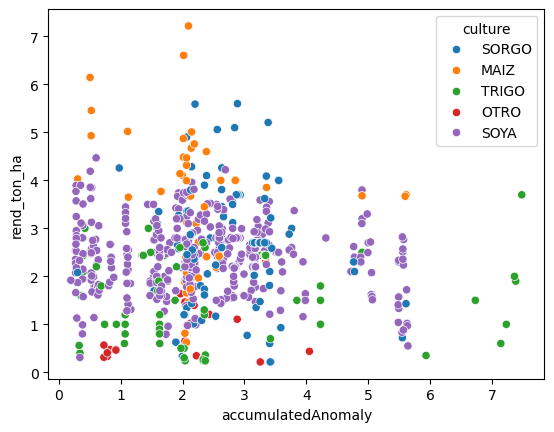

In [55]:
sns.scatterplot(
    data=df_mt.query(params_model['filter_str']), 
    x='accumulatedAnomaly', 
    y='rend_ton_ha', 
    hue='culture'
)

# Regress yields on NDPI

In [ ]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
df_aux = df[~(df["log_rend_ton_ha"].isin([np.inf, -np.inf]))].copy()
X = df_aux["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df_aux["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

In [ ]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
X = df["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Regress yields on anomaly

In [ ]:
df = df_backup.copy()
df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Filter rows with large SWC anomaly values

In [ ]:
#data_folder = Path("../../Data/regressions")
#filename = "yields_panel.csv"
#df = pd.read_csv(data_folder / filename)

df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
df = df[df["anomaly_sum"] < 10000]
# df = df[df["anomaly_sum"] > 0]
df = df[df["rend_ton_ha"] < 10]
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
# X = df["swc_sum"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
# y.replace([np.inf, -np.inf], np.nan, inplace=True)
# y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
red_model = sm.OLS(y, X)
red_results = red_model.fit()

# Print the regression results
print(red_results.summary())

In [33]:
anomaly_std = df["anomaly_sum"].std()
print(f"The standard deviation of the anomaly is: {anomaly_std:.2f}")
beta = results.params["anomaly_sum"]
print(f"The anomaly coefficient is: {beta:.6f}")

The standard deviation of the anomaly is: 1894.17
The anomaly coefficient is: 0.000061


In [ ]:
yield_mean = df["rend_ton_ha"].mean()

In [ ]:
print(
    f"A 1 standard deviation drought would reduce the yield by: {beta * anomaly_std:.2f} or {beta * anomaly_std / yield_mean*100:.2f}%"
)
print(
    f"A 2 standard deviation drought would reduce the yield by: {2*beta * anomaly_std:.2f} or {2*beta * anomaly_std / yield_mean*100:.2f}%"
)

A 1 standard deviation drought would reduce the yield by: 0.34 or 14.96%
A 2 standard deviation drought would reduce the yield by: 0.69 or 29.92%
